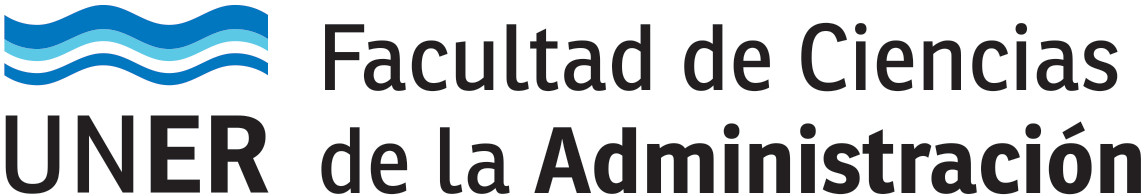

# **TP 5**: Aprendizaje I

## **Fecha de entrega**: 02/07/2025 a las 23:59hs.

**Condiciones de entrega:** el trabajo práctico deberá ser realizado en forma individual. Se deberá subir en la sección del Campus Virtual correspondiente el enlace a Colab. No olvidar configurar el documento para que sea accesible a cualquier persona con el enlace o en su defecto compartirlo con cristian.pacifico@uner.edu.ar y antonella.garcia@uner.edu.ar

Los datasets necesarios los encuentran en la carpeta compartida a inicio del cuatrimestre "**IA-1C2025**".

Se debe presentar el código solución a la consigna y algunas líneas adicionales de código que sirvan para testear la solución presentada. Además, pueden incluir en un campo de texto las respuestas, suposiciones y aclaraciones pertinentes de cada punto.

# **Arboles de decisión.**

# **Dataset**: [MBA](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset)

####Utilizar el dataset MBA.csv, que contiene datos sintéticos generados a partir de las estadísticas de la Clase Wharton 2025 de University of Pennsylvania. El objetivo es analizar los datos y construir un modelo que prediga el estado de admisión de los estudiantes.
####Metadatos:
* application_id: Identificador único para cada aplicación
* género: género del solicitante (masculino, femenino)
* internacional: Estudiante internacional (VERDADERO/FALSO)
* gpa: Promedio de calificaciones del solicitante (en una escala de 4.0)
* Especialidad: Licenciatura (Negocios, STEM, Humanidades)
* raza: origen racial del solicitante (por ejemplo, blanco, negro, asiático, hispano, otro / nulo: estudiante internacional)
* gmat: Puntuación GMAT del solicitante (800 puntos)
* work_exp: Número de años de experiencia laboral (Año)
* work_industry: Industria de la experiencia laboral previa del solicitante (por ejemplo, consultoría, finanzas, tecnología, etc.)
* Admisión: Estado de admisión (Admitir, Lista de espera, Nulo: Denegar)

1. Carga el dataset "MBA.csv" en un DataFrame "df" y mostrar las primeras 5 filas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("MBA.csv")

df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. Mostrar la información básica y las estadísticas descriptivas de las variables.

In [3]:
df.info(), df.describe(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


(None,
        application_id          gpa         gmat     work_exp
 count     6194.000000  6194.000000  6194.000000  6194.000000
 mean      3097.500000     3.250714   651.092993     5.016952
 std       1788.198115     0.151541    49.294883     1.032432
 min          1.000000     2.650000   570.000000     1.000000
 25%       1549.250000     3.150000   610.000000     4.000000
 50%       3097.500000     3.250000   650.000000     5.000000
 75%       4645.750000     3.350000   680.000000     6.000000
 max       6194.000000     3.770000   780.000000     9.000000,
 application_id       0
 gender               0
 international        0
 gpa                  0
 major                0
 race              1842
 gmat                 0
 work_exp             0
 work_industry        0
 admission         5194
 dtype: int64)

## Preprocesamiento del DataFrame.

3. Asignar el valor "Denegado" a las filas que contengan valores nulos en la columna "Admisión".

In [4]:
df['admission'] = df['admission'].fillna('Denegado')

df['admission'].isnull().sum()

np.int64(0)

4. Convertir las variables categóricas a valores numéricos y estandarizar las columnas que sean necesarias para el análisis.

In [5]:
#incorporar el código correspondiente

df_procesamiento = df.copy()

# Elmino application_id porque es solo un identificador y no aporta info
if 'application_id' in df_procesamiento.columns:
    df_procesamiento = df_procesamiento.drop('application_id', axis=1)



In [6]:
#Tengo que modificar estas
df_procesamiento.columns.tolist()

['gender',
 'international',
 'gpa',
 'major',
 'race',
 'gmat',
 'work_exp',
 'work_industry',
 'admission']

In [7]:
# Cambiar variables categorias a numericas 
categorias_columnas = ['gender', 'major', 'race', 'work_industry', 'admission']
label_encoders = {}

for col in categorias_columnas:
    if col in df_procesamiento.columns:
        # A los nulos los pongo con Unknown
        df_procesamiento[col] = df_procesamiento[col].fillna('Unknown')

        le = LabelEncoder()
        df_procesamiento[col] = le.fit_transform(df_procesamiento[col])
        label_encoders[col] = le

# Al booleano lo paso a numerico
if 'international' in df_procesamiento.columns:
    df_procesamiento['international'] = df_procesamiento['international'].astype(int)


In [8]:
# Estandarizo variables numericas 
numeric_columns = ['gpa', 'gmat', 'work_exp']
scaler = StandardScaler()

# si existen las columnas
existing_numeric_cols = [col for col in numeric_columns if col in df_procesamiento.columns]

if existing_numeric_cols:
    df_procesamiento[existing_numeric_cols] = scaler.fit_transform(df_procesamiento[existing_numeric_cols])
else:
    print(" No hay columnas numericas para estandarizar")


In [9]:
# Como quedo procesado
df_procesamiento.head(), df_procesamiento.shape

(   gender  international       gpa  major  race      gmat  work_exp  \
 0       0              0  0.325261      0     0 -0.630806 -1.953750   
 1       1              0  0.193273      1     1  0.586457 -0.016421   
 2       0              1  0.325261      0     4  1.195089 -0.016421   
 3       1              0  1.447159      2     1  0.789334  0.952244   
 4       1              0  0.655231      2     2 -1.239437 -0.016421   
 
    work_industry  admission  
 0              3          0  
 1              6          1  
 2             13          0  
 3             13          1  
 4              1          1  ,
 (6194, 9))

5. Separar los datos en entrenamiento y testeo, utilizando el 25% de los datos para testeo.

In [10]:
# Tengo que separar las caracteristicas X y variable objetivo y
X = df_procesamiento.drop('admission', axis=1)  # Todas las columnas excepto 'admission'
y = df_procesamiento['admission']                # Solo la columna 'admission'


In [11]:
# como quedo X y Y
X.shape, y.shape

((6194, 8), (6194,))

In [12]:
# Tengo que dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,     # defino testing
    random_state=42,    # determina la generacion de num randoms
    stratify=y          # Mantener proporción de clases
)

6. Construir un modelo de árbol de decisión para predecir si un estudiante será admitido o no.

In [13]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,           # limitar profundidad
    min_samples_split=20,   # min de muestras para dividir un nodo
    min_samples_leaf=10     # min de muestras en hoja
)

# Entreno modelo
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [14]:
# realizar predicciones
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

#Asi quedan las predicciones
y_pred_train, y_pred_test

(array([0, 1, 1, ..., 1, 1, 1], shape=(4645,)),
 array([0, 1, 1, ..., 1, 1, 1], shape=(1549,)))

7. Calcular las métricas que permitan evaluar la precisión del modelo.

In [15]:
#incorporar el código correspondiente
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_accuracy, test_accuracy


(0.8643702906350915, 0.8134280180761781)

In [16]:
# Se usan precision, recall y f1 score, 
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

precision_test, recall_test, f1_test

C:\Users\DevPerfil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7735572978999353, 0.8134280180761781, 0.7905677939604293)

In [17]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[  51,  174,    0],
       [  90, 1209,    0],
       [   6,   19,    0]])

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.35      0.23      0.27       225
           1       0.86      0.93      0.90      1299
           2       0.00      0.00      0.00        25

    accuracy                           0.81      1549
   macro avg       0.40      0.39      0.39      1549
weighted avg       0.77      0.81      0.79      1549



C:\Users\DevPerfil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DevPerfil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DevPerfil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_

8. A partir de las métricas obtenidas: ¿Qué podemos decir del modelo creado?

Tiene un buen rendimiento, en el conjunto de testing 81.3% accurracy, esto significa que 8 de cada 10 solicitudes de admision son clasificadas correctamente. La diferencia con el accurracy de entrenamiento es de 86.4% que es un pequeño sobreajuste pero aceptable.
Sobre las clases, tiene un desempeño desigual entre las diferentes clases. Para los admitidos (Admit), el modelo funciona bien con un recall de 93%, detectando correctamente la gran mayoria de estudiantes seran admitidos. Pero con la clase Denegado solo logra un 23% y 35% de precision, confundiendo el 77% de los casos denegados clasificandolos como admitidos erroreneamente. Pero en la clase Waitlist, donde el modelo tiene un 0% entonces nunca predice esta categoria.

Veo que el problema principal del modelo es que sufre un problema de desbalance de clases, porque el dataset tiene 84% de casos Admit, 14% de denegado y 2% waitlist. Esto hace que el modelo se sesgue a predecir la clase de la mayoria, hace incapaz de reconocer casos de waitlist.



#**Dataset** *car.csv*
Se debe crear un modelo de árbol de decisión confiable que sea capaz de ayudar a una empresa a encontrar automóviles que los clientes probablemente comprarán. Se debe construir un modelo de árbol de decisión que clasifique los automóviles como aceptables o no aceptables.
El dataset se encuentra disponible en el campus junto a este práctico *car.csv* y se compone de seis características diferentes: compra, mantenimiento, puertas, personas, maletero y seguridad. La variable objetivo clasifica la aceptabilidad de un automóvil determinado. Puede tomar 0 o 1, siendo 1 aceptable.

1. Utilizar el 70\% de los datos para entrenamiento y el 30\% restante para testeo.

In [19]:
df_car = pd.read_csv("car.csv")

df_car.head(), df_car.info(), df_car['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maintenance   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   luggage_boot  1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


(  buying maintenance doors persons luggage_boot safety  class
 0  vhigh       vhigh     2       2        small    low  unacc
 1  vhigh       vhigh     2       2        small    med  unacc
 2  vhigh       vhigh     2       2        small   high  unacc
 3  vhigh       vhigh     2       2          med    low  unacc
 4  vhigh       vhigh     2       2          med    med  unacc,
 None,
 class
 unacc    1210
 acc       384
 good       69
 vgood      65
 Name: count, dtype: int64)

In [20]:
# Lo paso a binario los aceptables son 1 y los que no 0
df_car['class_binary'] = df_car['class'].apply(lambda x: 1 if x in ['acc', 'good', 'vgood'] else 0)

In [21]:
df_car_processed = df_car.copy()

# saco el class original porque uso el binario
df_car_processed = df_car_processed.drop('class', axis=1)

# tengo que preprocesar 
categorical_cols = ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety']
label_encoders_car = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_car_processed[col] = le.fit_transform(df_car_processed[col])
    label_encoders_car[col] = le

df_car_processed.head()

,buying,maintenance,doors,persons,luggage_boot,safety,class_binary
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


In [22]:
# Separo en X y Y
X_car = df_car_processed.drop('class_binary', axis=1)
y_car = df_car_processed['class_binary']

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(
    X_car, y_car,
    test_size=0.30,  # 30% para testing
    random_state=42,
    stratify=y_car
)

2. Evaluar la precisión del modelo utilizando **Accuracy**.

In [23]:
dt_car_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,           
    min_samples_split=10,   
    min_samples_leaf=5      
)

dt_car_model.fit(X_train_car, y_train_car)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [24]:
# hago predicciones
y_pred_train_car = dt_car_model.predict(X_train_car)
y_pred_test_car = dt_car_model.predict(X_test_car)

In [25]:
# calculo accuracy
train_accuracy_car = accuracy_score(y_train_car, y_pred_train_car)
test_accuracy_car = accuracy_score(y_test_car, y_pred_test_car)

train_accuracy_car, test_accuracy_car

(0.9801488833746899, 0.9788053949903661)

In [26]:
print(classification_report(y_test_car, y_pred_test_car))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       363
           1       0.95      0.98      0.97       156

    accuracy                           0.98       519
   macro avg       0.97      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [27]:
cm_car = confusion_matrix(y_test_car, y_pred_test_car)
cm_car

array([[355,   8],
       [  3, 153]])

3. A partir de la métrica obtenida: ¿Qué podemos decir del modelo creado?

Del modelo creado podemos decir que, muestra un buen rendimiento para clasificar la aceptabilidad de autos.
Tiene un accuracy de 97.88% en el testing, clasifica bien 98 de cada 100 automoviles. Y la diferencia con el accuracy de entrenamiento 98.01%, es de 0.13% osea generaliza bien datos nuevos.
Veo tambien que hay un buen balance entre clases, por ejemplo para los autos no aceptables tiene una precision del 99% y recall del 98%. Mientras para los autos aceptables tiene una precision del 95% y recall del 98%. Despues tenemos la matriz de confucion que hubo 11 (el 3 y 8 de la matriz) errores de 519. Es confiable modelo y se puede usar para la identificar los autos que los clientes podrian comprar

# **Dataset**: *Breast Cancer.csv*

Utilizar el dataset de cáncer de mama disponible en sklearn para predecir la presencia de cáncer maligno utilizando regresión logística.

1. Utilizar el 20\% de los datos para testeo.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [29]:
# cargo dataset y lo separo en X e y
breast_cancer = load_breast_cancer()

X_breast = breast_cancer.data
y_breast = breast_cancer.target

In [30]:
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    X_breast, y_breast,
    test_size=0.20, 
    random_state=42,
    stratify=y_breast
)

In [31]:
# Estandarizo las caracteristicas para la regresion 
scaler_breast = StandardScaler()
X_train_breast_scaled = scaler_breast.fit_transform(X_train_breast)
X_test_breast_scaled = scaler_breast.transform(X_test_breast)

In [32]:
# creo modelo y entreno
logreg_breast = LogisticRegression(random_state=42, max_iter=1000)
logreg_breast.fit(X_train_breast_scaled, y_train_breast)

LogisticRegression(max_iter=1000, random_state=42)

2. Evaluar el rendimiento del modelo utilizando las métricas **Accuracy**, **Precision** y **Recall**.

In [33]:
# hago predicciones
y_pred_train_breast = logreg_breast.predict(X_train_breast_scaled)
y_pred_test_breast = logreg_breast.predict(X_test_breast_scaled)

In [34]:
# calculo las accuracy
train_accuracy_breast = accuracy_score(y_train_breast, y_pred_train_breast)
test_accuracy_breast = accuracy_score(y_test_breast, y_pred_test_breast)

train_accuracy_breast, test_accuracy_breast

(0.989010989010989, 0.9824561403508771)

In [35]:
# calculo precision, recall
precision_breast = precision_score(y_test_breast, y_pred_test_breast)
recall_breast = recall_score(y_test_breast, y_pred_test_breast)

precision_breast, recall_breast

(0.9861111111111112, 0.9861111111111112)

3. Obtener la matriz de confusión del modelo.

In [36]:
cm_breast = confusion_matrix(y_test_breast, y_pred_test_breast)
cm_breast

array([[41,  1],
       [ 1, 71]])

# **Dataset**: *ClientesEnLinea.csv*

Crear un modelo de Regresión Logística utilizando el dataset *ClientesEnLinea.csv* que cuenta con información de clientes que compran o no ciertos productos en línea para ello contamos con información sobre el género, la edad y el salario estimado, clasificando a los clientes con 0 y 1 si no compró o si compró respectivamente.

1. Utilizar como métrica comparativa el promedio de una validación cruzada K-fold con 5 folds para entrenamiento y testeo.

In [37]:
df_clientes = pd.read_csv("ClientesEnLinea.csv")

In [38]:
# hacemos preprocesamiento
df_clientes_processed = df_clientes.copy()

# borro ID porque es solo un identificador y no aporta info
if 'ID' in df_clientes_processed.columns:
    df_clientes_processed = df_clientes_processed.drop('ID', axis=1)

le_sex = LabelEncoder()
# paso sex categorica a numerica
df_clientes_processed['Sex'] = le_sex.fit_transform(df_clientes_processed['Sex'])

In [39]:
# separo las caracteristicas X y variable objetivo y
X_clientes_all = df_clientes_processed.drop('Compra', axis=1)
y_clientes = df_clientes_processed['Compra']

In [40]:
# hay que estandarizar las caracteristicas
scaler_clientes = StandardScaler()
X_clientes_all_scaled = scaler_clientes.fit_transform(X_clientes_all)

logreg_clientes = LogisticRegression(random_state=42, max_iter=1000)

# aca hago la validacion cruzada k-fold con 5 folds
cv_scores_all = cross_val_score(logreg_clientes, X_clientes_all_scaled, y_clientes, 
                                cv=5, scoring='accuracy')

cv_scores_all, cv_scores_all.mean()

(array([0.7   , 0.95  , 0.9375, 0.8125, 0.7   ]), np.float64(0.82))

2. ¿Cómo se comporta el modelo si consideramos todos los predictores?

Si tenemos en cuenta todos los predictores Sexo, Edad y Salario Estimado, el modelo de regresion muestra un rendimiento aceptable pero variabilidad

Con la validacion cruzada K-fold de 5 folds, el modelo obtiene un accuracy promedio del 82%, osea que clasifica correctamente 8 de cada 10 clientes respecto a si compraran o no. Los folds varian entre 70% hasta 95% de accuracy, osea el modelo es sensible a los datos de entrenamiento y puede ser inestable. 

3. ¿Qué sucede cuando solo consideramos como predictores Sexo y Edad?

In [41]:
# lo limito con sex y edad
X_clientes_limited = df_clientes_processed[['Sex', 'Edad']]

# lo mismo de siempre
scaler_limited = StandardScaler()
X_clientes_limited_scaled = scaler_limited.fit_transform(X_clientes_limited)

# cruzada pero con sex y edad
logreg_limited = LogisticRegression(random_state=42, max_iter=1000)
cv_scores_limited = cross_val_score(logreg_limited, X_clientes_limited_scaled, y_clientes, 
                                   cv=5, scoring='accuracy')

#se usa esto
list(X_clientes_limited.columns)

['Sex', 'Edad']

In [42]:
# El primerio es el promedio con todos, el segundo es el limitado y el ultimo es la diferencia entre ambos
cv_scores_all.mean(), cv_scores_limited.mean(), cv_scores_all.mean() - cv_scores_limited.mean()

(np.float64(0.82),
 np.float64(0.8174999999999999),
 np.float64(0.0025000000000000577))

Si solo vemos sex y edad, el modelo de regresion es inferior que el modelo anterior, el accuracy promedio pasa a 81.75%, osea una perdida de 0.25% a diferencia con el modelo que tiene todo los folds.

#***Regresión lineal***

# **Dataset**: *articulos_ml.csv*

A partir del dataset *articulos_ml.csv* que se encuentra disponible en el campus y contiene diversas URLs a artículos sobre Machine Learning. Se debe construir un modelo de regresión lineal para predecir cuantas veces será compartido un artículo en redes sociales basándonos en la cantidad de palabras del artículo.

1. Mostrar las columnas disponibles en el dataset *articulos\_ml.csv*.

In [43]:
df_articulos = pd.read_csv("articulos_ml.csv")

# muestro las columnas csv
df_articulos.columns.tolist()

['Title',
 'url',
 'Word count',
 '# of Links',
 '# of comments',
 '# Images video',
 'Elapsed days',
 '# Shares']

2. Crear gráficos para visualizar la relación entre las variables del dataset.

Text(0.5, 1.0, 'relacion entre Palabras contadas y Shares')

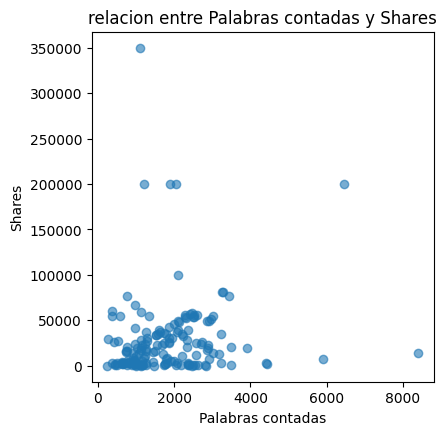

In [44]:
plt.figure(figsize=(15,10))

# grafico de entre palabras contadas y shares
plt.subplot(2, 3, 1)
plt.scatter(df_articulos['Word count'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('Palabras contadas')
plt.ylabel('Shares')
plt.title('relacion entre Palabras contadas y Shares')


Text(0.5, 1.0, 'Relacion entre Imagenes/Videos y Shares')

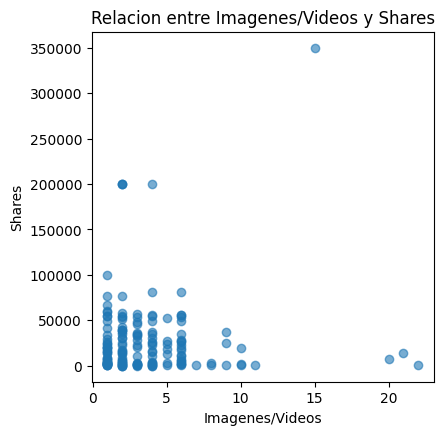

In [45]:
plt.figure(figsize=(15,10))

# grafico que muestra la relacion entre imagenes/videos y shares
plt.subplot(2, 3, 3)
plt.scatter(df_articulos['# Images video'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('Imagenes/Videos')
plt.ylabel('Shares')
plt.title('Relacion entre Imagenes/Videos y Shares')

Text(0.5, 1.0, 'Relacion entre Comentarios y Shares')

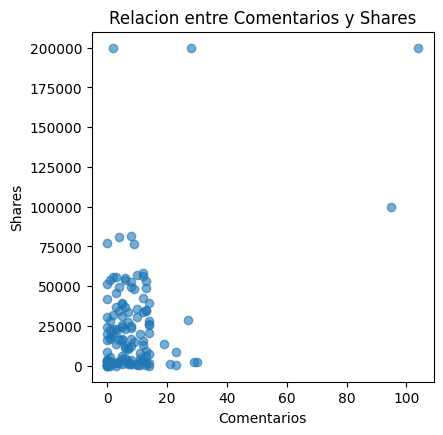

In [46]:
plt.figure(figsize=(15,10))

# grafico que muestra la relacion entre comentarios y shares
plt.subplot(2, 3, 5)
plt.scatter(df_articulos['# of comments'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('Comentarios')
plt.ylabel('Shares')
plt.title('Relacion entre Comentarios y Shares')

3. Filtrar los artículos que tengan menos de 3500 palabras y una cantidad de compartidos menor a 80,000 para analizar un conjunto más específico de datos.

In [47]:
# filtro lo que pide el punto 3
df_articulos_filtrado = df_articulos[
    (df_articulos['Word count'] < 3500) & 
    (df_articulos['# Shares'] < 80000)
].copy()


df_articulos_filtrado[['Word count', '# Shares']].describe(), df_articulos_filtrado.count() # 148 articulos?

(        Word count      # Shares
 count   148.000000    148.000000
 mean   1640.209459  20545.648649
 std     821.975365  19933.865031
 min     250.000000      0.000000
 25%     971.000000   2750.000000
 50%    1536.000000  15836.000000
 75%    2335.750000  34177.500000
 max    3485.000000  77000.000000,
 Title             148
 url               116
 Word count        148
 # of Links        148
 # of comments     121
 # Images video    148
 Elapsed days      148
 # Shares          148
 dtype: int64)

4. Utilizar los datos filtrados para generar un modelo de regresión lineal y graficar la relación entre las palabras del artículo y la cantidad de veces que son compartidos.

In [48]:
# x es var independiente y es la variable dependiente

X_articulos = df_articulos_filtrado[['Word count']]
y_articulos = df_articulos_filtrado['# Shares']


# creo y entreno el modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_articulos, y_articulos)

# predicciones
y_pred_articulos = modelo_lineal.predict(X_articulos)

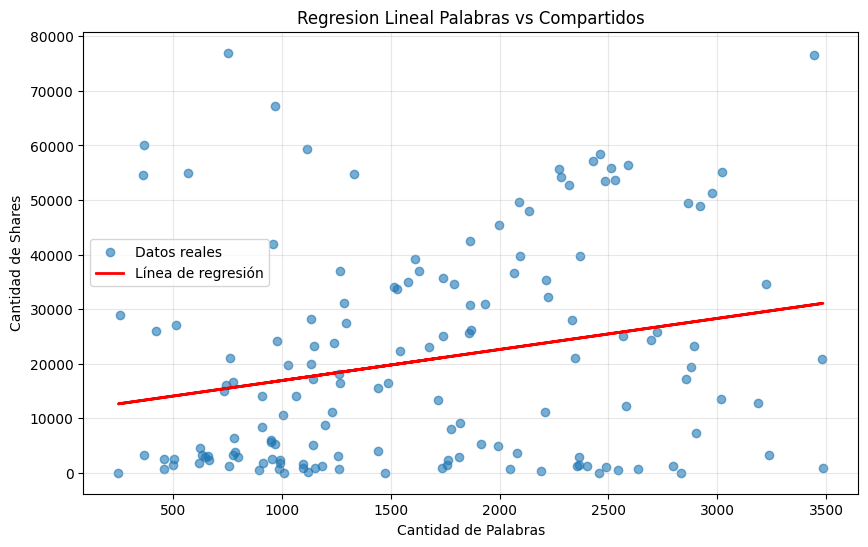

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_articulos, y_articulos, alpha=0.6, label='Datos reales')
plt.plot(X_articulos, y_pred_articulos, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Cantidad de Shares')
plt.title('Regresion Lineal Palabras vs Compartidos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


5. Utilizar el modelo generado para predecir la cantidad de veces que serán compartidos artículos de 2000, 5000 y 10000 palabras.

In [50]:
# tengo que hacer predicciones para 2000, 5000 y 10000 palabras
palabras_a_predecir = [[2000], [5000], [10000]]

predicciones = modelo_lineal.predict(palabras_a_predecir)

# muestro las predicciones
for i, palabras in enumerate([2000, 5000, 10000]):
    print(f"Artículo de {palabras} palabras: {predicciones[i]} compartidos")


Artículo de 2000 palabras: 22595.610537853703 compartidos
Artículo de 5000 palabras: 39688.57151002302 compartidos
Artículo de 10000 palabras: 68176.83979697188 compartidos


C:\Users\DevPerfil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6. Mostrar los coeficientes del modelo.

In [51]:
intercepto = modelo_lineal.intercept_
pendiente = modelo_lineal.coef_[0]

# El intercepto que es la ordenada al origen y la pendiente que es el coeficiente de la variable
intercepto, pendiente


(np.float64(11200.30322307416), np.float64(5.697653657389773))

7. Evaluar el modelo aplicando las métricas **Error Cuadrático Medio** y **Coeficiente de Determinación (R2)**.

In [ ]:
#incorporar el código correspondiente


mse = mean_squared_error(y_articulos, y_pred_articulos)
rmse = np.sqrt(mse)
r2 = r2_score(y_articulos, y_pred_articulos)

mse, rmse, r2

# El mse sirve para sacar el rmse
# El rmse (raiz del error cuadratico medio) por lo que entiendo, devuelve las unidades originales (aca shares)
# Osea las predicciones del modelo se equivocan 19,310, entiendo yo que es impreciso
# R2 mide la proporcion que varia la cantidad de shares en este caso por la cantidad de palabras del articulo, va de 0 a 1
# dio 0.055 bajisimo

(372888728.3398661, np.float64(19310.32698687068), 0.05519842281951404)